# Getting to know a dataset

## Initial exploration

Exploratory Data Analysis, or EDA for short, is the process of cleaning and reviewing data to derive insights such as descriptive statistics and correlation and generate hypotheses for experiments. 

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv('datasets/clean_books.csv')
books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


Sumario de cuántos valores faltantes hay

In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


¿Cuántos valores tengo en columnas categóricas?

In [5]:
books.value_counts('genre')

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

Sumario de columnas numéricas

In [6]:
books.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


Distribución de datos numéricos

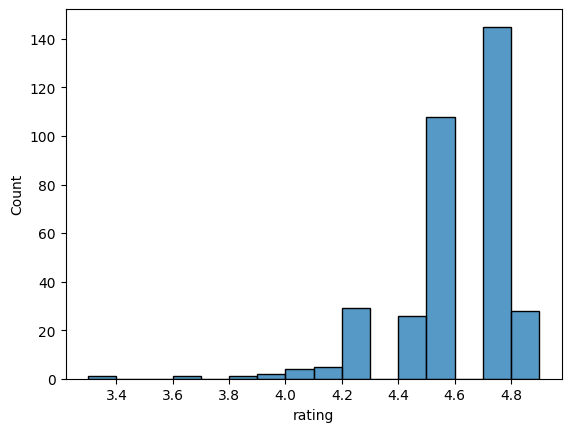

In [9]:
sns.histplot(data=books, x='rating', binwidth=.1)
plt.show() 

## Data validation

understand whether data types and ranges are as expected

In [15]:
# Checar el tipo
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

In [14]:
# Cambiar el tipo
books['year'] = books['year'].astype(int)
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

In [16]:
# comparing values in a column to a list of expected values 
books['genre'].isin(['Fiction', 'Non Fiction'])

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

In [29]:
other = ~books['genre'].isin(['Fiction', 'Non Fiction'])  #tiene que pasarse como lista, aunque sea 1

In [30]:
# Filtering the DataFrame for only values that are in our list
books[other].head()

,name,author,rating,year,genre
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens
26,Baby Touch and Feel: Animals,DK,4.6,2015,Childrens
36,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,2017,Childrens
37,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,2011,Childrens
53,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,2015,Childrens


In [22]:
books.select_dtypes('number').head()

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019


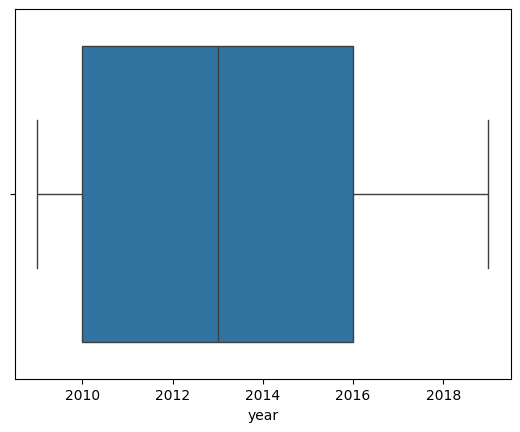

In [25]:
# distribución de una variable
sns.boxplot(data=books, x='year')
plt.show()

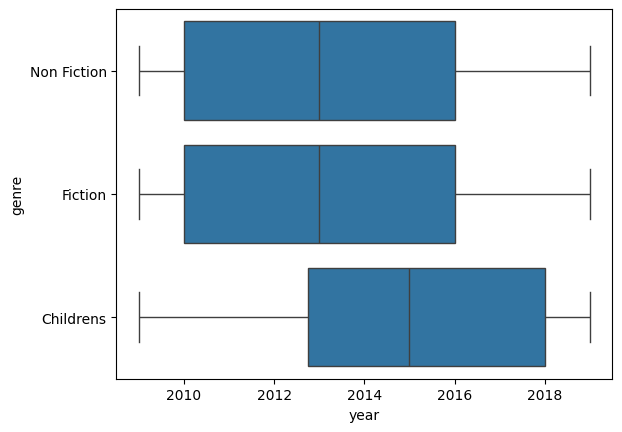

In [28]:
# distribución de dos variables
sns.boxplot(data=books, x='year', y='genre')
plt.show()

## Data summarization

In [31]:
# mean, count, sum, min, max, var, std

books[['genre','rating','year']].groupby('genre').mean()

,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


In [ ]:
# Cuando es más de una función, se usa .agg()

In [32]:
books[['rating','year']].agg(['mean','std'])

,rating,year
mean,4.608571,2013.508571
std,0.226941,3.284711


In [33]:
books[['genre','rating','year']].groupby('genre').agg(['mean','std'])

rating                   year          
                 mean       std         mean       std
genre                                                 
Childrens    4.780000  0.122370  2015.075000  3.300253
Fiction      4.570229  0.281123  2013.022901  3.089600
Non Fiction  4.598324  0.179411  2013.513966  3.327376

In [35]:
# Specifying aggregations for columns

books.agg({'rating':['mean','std'],'year':['median']})

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


In [36]:
books[['genre','rating','year']].groupby('genre').agg({'rating':['mean','std'],'year':['median']})

rating              year
                 mean       std  median
genre                                  
Childrens    4.780000  0.122370  2015.0
Fiction      4.570229  0.281123  2013.0
Non Fiction  4.598324  0.179411  2013.0

In [40]:
# Named summary columns

books.groupby('genre').agg(
    mean_ratings=('rating','mean'),
    std_ratings=('rating','std'),
    median_year=('year','median')
)

'''
 We can create named columns with our desired aggregations by using the .agg() 
 and creating named tuples inside it. Each named tuple should include a column name 
 followed by the aggregating function to apply to that column.
'''

,mean_ratings,std_ratings,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


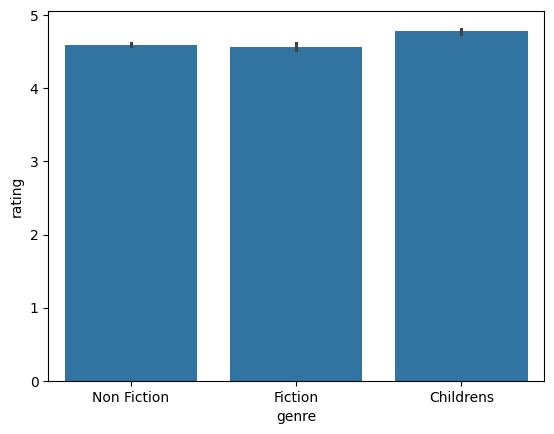

In [43]:
# Visualizing categorical summaries

sns.barplot(data=books, x='genre', y='rating')
plt.show()

In Seaborn, bar plots also show a 95% confidence interval for the mean as a vertical line on the top of each bar. El punto donde toca la línea dentro de la barra sería lo menos que podría ocurrir, y el punto fuera sería lo máximo.

# Data Cleaning and Imputation

In [45]:
salaries = pd.read_csv('datasets/ds_salaries_clean.csv')

In [46]:
print(salaries.isna().sum())

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64


There are various approaches to handle missing data. One rule of thumb is to remove observations if they amount to five percent or less of all values. If we have more missing values, instead of dropping them, we can replace them with a summary statistic like the mean, median, or mode, depending on the context. This is known as imputation. Alternatively, we can impute by sub-groups.

In [47]:
# Calculate missing values threshold 
threshold = len(salaries) * 0.05
print(threshold)

30.35


In [49]:
# Finding which columns is safe to drop values
cols_to_drop = salaries.columns[salaries.isna().sum() <= threshold]
print(cols_to_drop)

# Dropping missing values
salaries.dropna(subset=cols_to_drop, inplace=True)

Index(['Working_Year', 'Designation', 'Experience', 'Employment_Status',
       'Employee_Location', 'Company_Size', 'Remote_Working_Ratio',
       'Salary_USD'],
      dtype='object')


In [53]:
# Imputing a summary statistic
cols_with_missing_values = salaries.columns[salaries.isna().sum() > 0]
print(cols_with_missing_values)

for col in cols_with_missing_values[:-1]:
    salaries[col].fillna(salaries[col].mode()[0])

Index([], dtype='object')


In [55]:
# Creating a dictionary for imputation
salaries_dict = salaries.groupby('Experience')['Salary_USD'].median().to_dict()
print(salaries_dict)

{'Entry': 53948.0, 'Executive': 163694.5, 'Mid': 73465.0, 'Senior': 129380.0}


In [56]:
# Imputing by sub-group
salaries['Salary_USD'] = salaries['Salary_USD'].fillna(salaries['Experience'].map(salaries_dict))